# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC
from sklearn import svm

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import VotingClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Read the raw data into Python from csv

In [2]:
raw_data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
print("Number of row and column = ", raw_data.shape)
raw_data.head()

Number of row and column =  (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Dataset Statistics

In [6]:
len(raw_data.query('JobInvolvement == 1 & Attrition == "Yes"'))/len(raw_data.query('JobInvolvement == 1'))

0.3373493975903614

In [7]:
len(raw_data.query('JobSatisfaction == 1 & Attrition == "Yes"'))/len(raw_data.query('JobSatisfaction == 1'))

0.22837370242214533

In [8]:
((0.3373493975903614 + 0.22837370242214533)/2)*100

28.286155000625335

In [13]:
(len(raw_data.query('WorkLifeBalance == 1 & Attrition == "Yes"'))/len(raw_data.query('WorkLifeBalance == 1')))*100

31.25

In [14]:
(len(raw_data.query('WorkLifeBalance == 4 & Attrition == "Yes"'))/len(raw_data.query('WorkLifeBalance == 4')))*100

17.647058823529413

# Data Pre-Processing

In [4]:
# print all column names as a list
print(raw_data.columns.tolist())

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [5]:
# Checking for null values
raw_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
# Return DataFrame with duplicate rows removed
raw_data.drop_duplicates()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [7]:
raw_data.shape

(1470, 35)

In [8]:
# printing basic statistical infos per feature of the dataset
raw_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Investigate the categorical plots

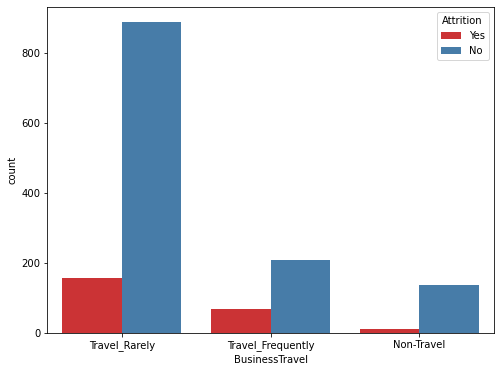

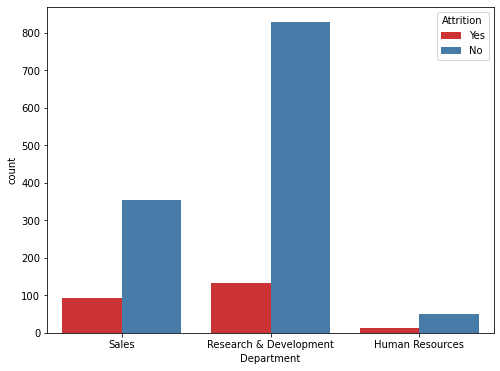

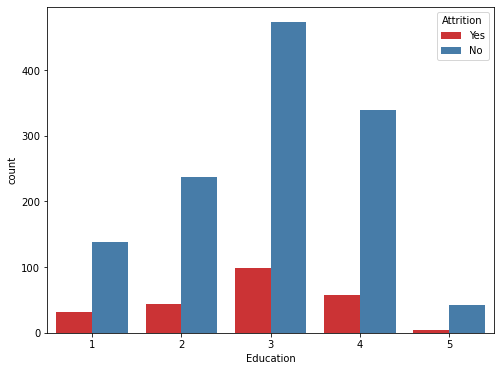

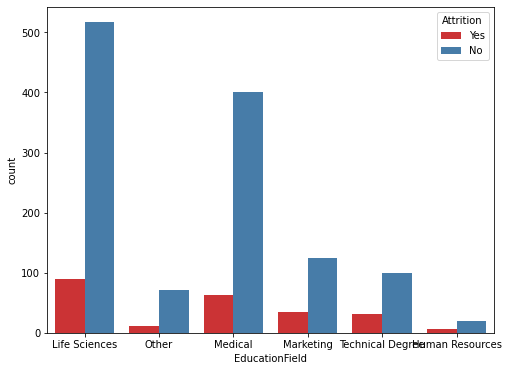

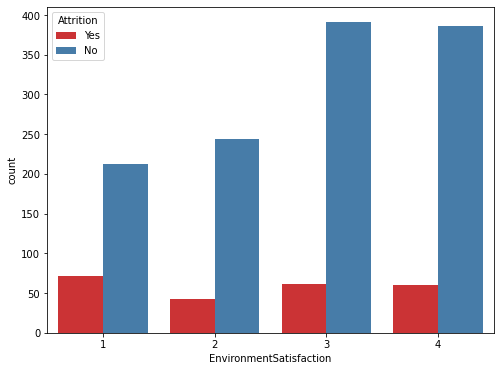

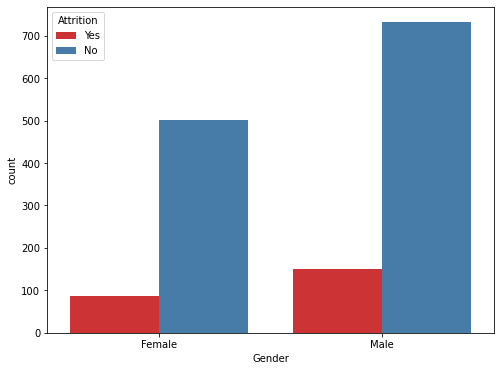

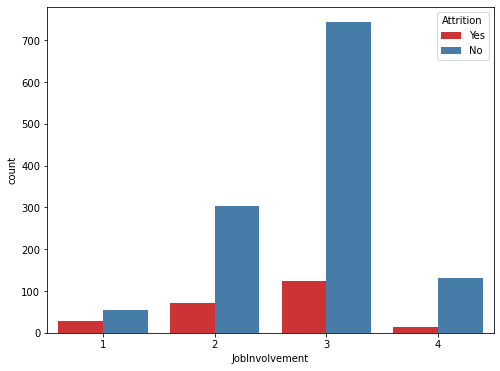

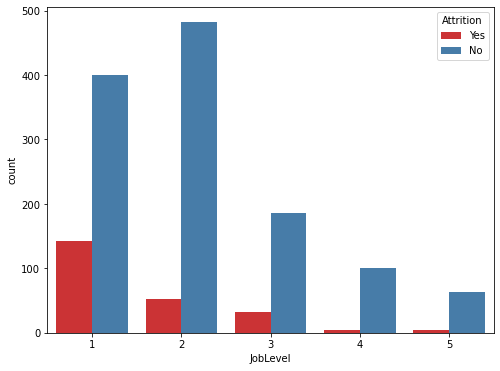

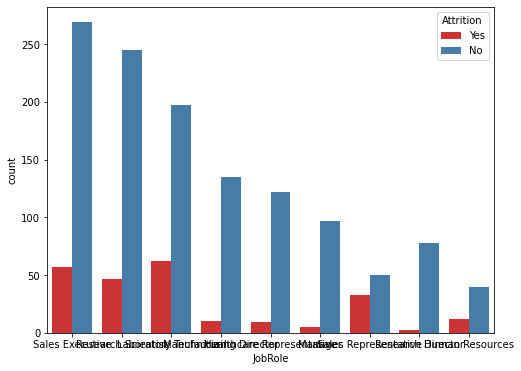

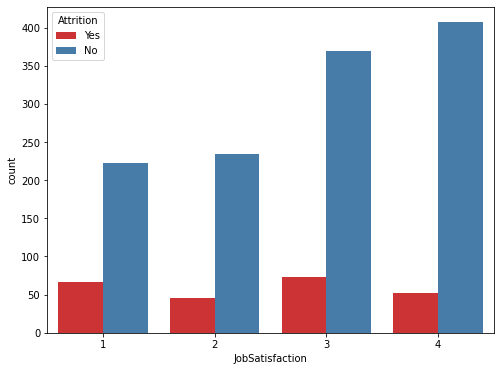

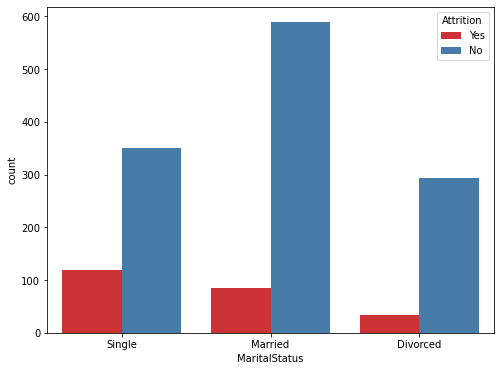

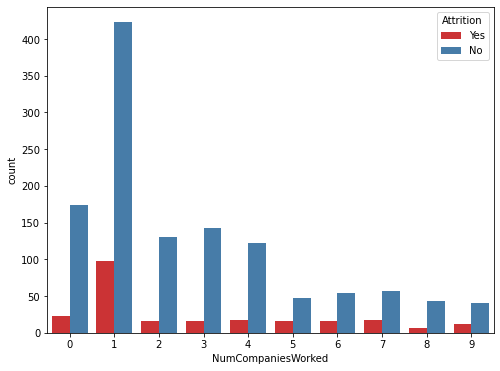

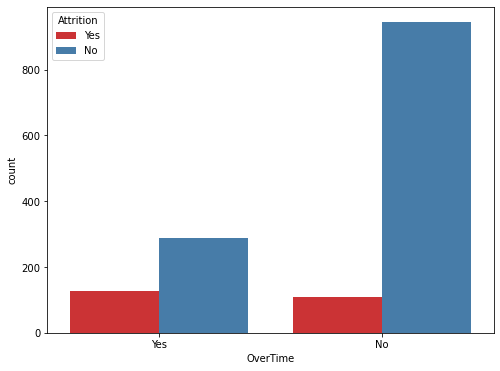

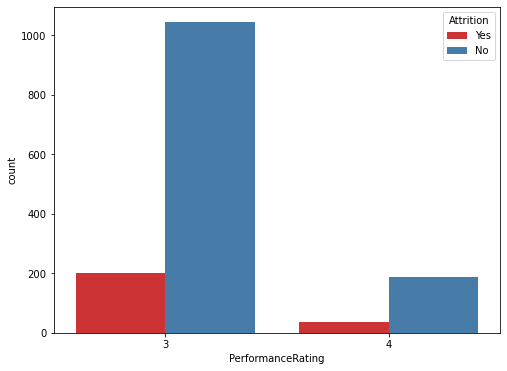

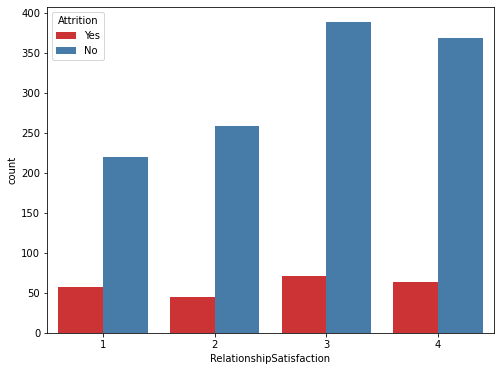

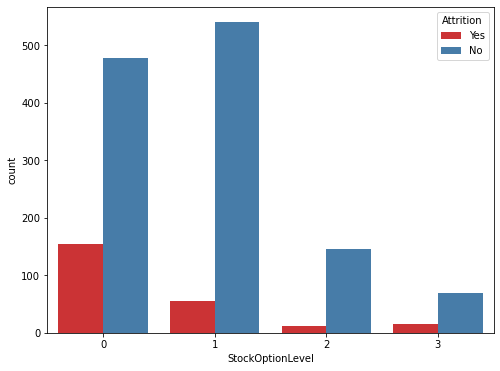

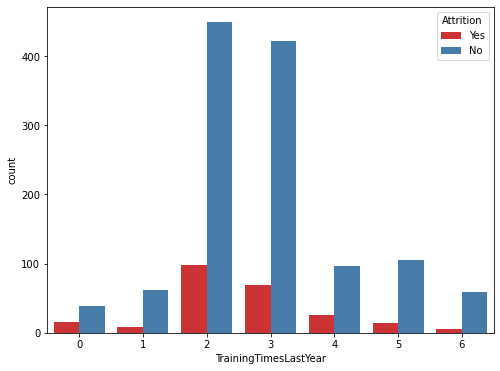

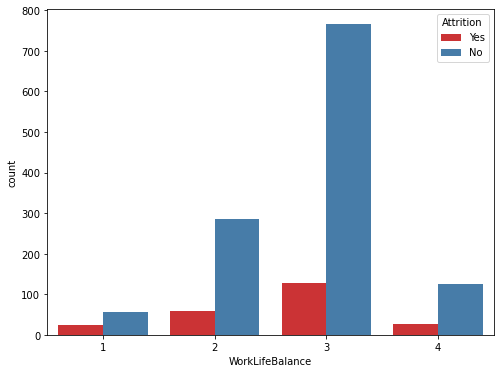

In [9]:
categorcial_features = ['BusinessTravel', 'Department','Education', 'EducationField',
                       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 
                        'JobRole', 'JobSatisfaction', 'MaritalStatus','NumCompaniesWorked', 'OverTime', 'PerformanceRating', 
                        'RelationshipSatisfaction', 'StockOptionLevel','TrainingTimesLastYear', 'WorkLifeBalance']

for category in categorcial_features:
    plt.figure(figsize = (8, 6))
    sns.countplot(x = category, data = raw_data, hue = 'Attrition', palette = 'Set1')

### Making numeric representation of categorical variables

In [10]:
le = LabelEncoder()
for column in raw_data.columns:
    raw_data[column] = le.fit_transform(raw_data[column]);   


In [11]:
raw_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,0,1,...,3,0,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,0,2,...,1,0,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,0,3,...,2,0,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,4,...,3,0,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,1,3,0,1465,...,2,0,1,17,3,2,5,2,0,3
1466,21,0,2,327,1,5,0,3,0,1466,...,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,0,1467,...,1,0,1,6,0,2,6,2,0,3
1468,31,0,1,579,2,1,2,3,0,1468,...,3,0,0,17,3,1,9,6,0,8


In [12]:
# Investigate all the elements within each Feature 
for column in raw_data.columns:
    unique_vals = raw_data[column].unique()
    length = len(unique_vals)
    if length < 18:
        print("The number of values for feature {}: {} ---> {}".format(column, length, unique_vals))
    else:
        print("The number of values for feature {}: {}".format(column, length))

The number of values for feature Age: 43
The number of values for feature Attrition: 2 ---> [1 0]
The number of values for feature BusinessTravel: 3 ---> [2 1 0]
The number of values for feature DailyRate: 886
The number of values for feature Department: 3 ---> [2 1 0]
The number of values for feature DistanceFromHome: 29
The number of values for feature Education: 5 ---> [1 0 3 2 4]
The number of values for feature EducationField: 6 ---> [1 4 3 2 5 0]
The number of values for feature EmployeeCount: 1 ---> [0]
The number of values for feature EmployeeNumber: 1470
The number of values for feature EnvironmentSatisfaction: 4 ---> [1 2 3 0]
The number of values for feature Gender: 2 ---> [0 1]
The number of values for feature HourlyRate: 71
The number of values for feature JobInvolvement: 4 ---> [2 1 3 0]
The number of values for feature JobLevel: 5 ---> [1 0 2 3 4]
The number of values for feature JobRole: 9 ---> [7 6 2 4 0 3 8 5 1]
The number of values for feature JobSatisfaction: 4 --->

In [13]:
# Remove the EmployeeNumber column as its unique for every employees
raw_data.drop(columns = 'EmployeeNumber', inplace = True)

In [14]:
raw_data.shape

(1470, 34)

### Dropping Constant Features using Variance Threshold Technique

In [15]:
var_thresh = VarianceThreshold()  # by default the threshold = 0
var_thresh.fit(raw_data)

VarianceThreshold()

In [16]:
var_thresh.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True])

In [17]:
print("All features: ", raw_data.columns)
print("Features Selected: ", raw_data.columns[var_thresh.get_support()])

All features:  Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Features Selected:  Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',


In [18]:
# the following code drops the columns based on the variance threshold algorithm
selected_columns = raw_data.columns[var_thresh.get_support()]
for cols in raw_data.columns:
    if cols not in selected_columns:
        raw_data.drop(columns = cols, inplace = True)

In [19]:
raw_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,...,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,...,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,1,3,2,1,...,0,2,1,17,3,2,5,2,0,3
1466,21,0,2,327,1,5,0,3,3,1,...,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,1,1,...,1,1,1,6,0,2,6,2,0,3
1468,31,0,1,579,2,1,2,3,3,1,...,0,3,0,17,3,1,9,6,0,8


In [20]:
raw_data.shape

(1470, 31)

In [21]:
raw_data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

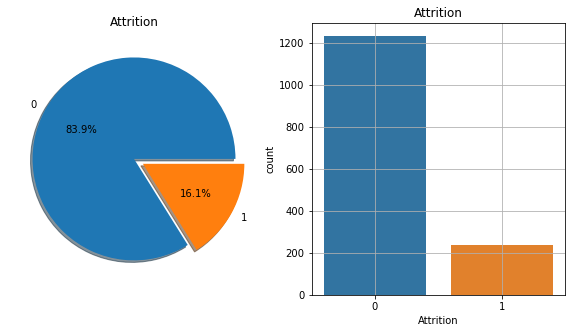

In [22]:
# outcome has a class imbalence issue so we need to follow the stratified splitting
f,ax = plt.subplots(1,2, figsize=(10,5))
raw_data['Attrition'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Attrition')
ax[0].set_ylabel('')
sns.countplot('Attrition', data=raw_data, ax=ax[1])
ax[1].set_title('Attrition')
N,P = raw_data['Attrition'].value_counts()

plt.grid()
plt.show()

### Separate independant (X) and dependant (y) features

In [23]:
X = raw_data.drop(columns = 'Attrition') # Input features (attributes)
y = raw_data['Attrition'] # Target Vector

In [24]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,2,624,2,0,1,1,1,0,64,...,0,0,0,8,0,0,6,4,0,5
1,31,1,113,1,7,0,1,2,1,31,...,1,3,1,10,3,2,10,7,1,7
2,19,2,805,1,1,1,4,3,1,62,...,0,1,0,7,3,2,0,0,0,0
3,15,1,820,1,2,3,1,3,0,26,...,0,2,0,8,3,2,8,7,3,0
4,9,2,312,1,1,0,3,0,1,10,...,0,3,1,6,3,2,2,2,2,2


In [25]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

### Train Test Split for finding correlation between features

In [26]:
# check if the dataset is imbalanced or not
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [27]:
# Let's first drop the feature EmployeeNumber as it is a personal identifier
# Let's split the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

In [28]:
X_train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Feature Selection using Pearson's correlation

In [29]:
corr = X_train.corr()
corr

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.038014,0.015998,-0.046599,-0.005161,0.187154,-0.046238,-0.007012,-0.061485,0.030922,...,-0.004644,0.069866,0.016627,0.679420,-0.043217,-0.035722,0.308634,0.209072,0.214019,0.197165
BusinessTravel,0.038014,1.000000,-0.000553,0.004883,-0.027445,0.010021,0.026951,-0.006230,-0.043234,0.030381,...,-0.024707,-0.025807,-0.007370,0.040075,0.008707,-0.018188,0.015308,0.009735,-0.023954,0.016761
DailyRate,0.015998,-0.000553,1.000000,0.008632,-0.005676,-0.011658,0.046241,0.004290,-0.013251,0.026894,...,0.012679,0.009452,0.047633,0.019321,-0.022141,-0.016404,-0.032747,0.002438,-0.027857,-0.043061
Department,-0.046599,0.004883,0.008632,1.000000,0.008066,0.000737,0.026149,-0.040879,-0.044602,-0.023215,...,-0.016052,-0.024558,-0.044953,-0.036282,0.054639,0.041309,0.012812,0.049035,0.026892,0.022424
DistanceFromHome,-0.005161,-0.027445,-0.005676,0.008066,1.000000,0.007319,0.013881,-0.032635,-0.024583,0.043558,...,0.036333,-0.000617,0.032807,0.006341,-0.055914,-0.027577,0.003907,0.009419,0.002892,0.012050
Education,0.187154,0.010021,-0.011658,0.000737,0.007319,1.000000,-0.028398,-0.018583,-0.038402,0.029077,...,-0.008365,-0.006887,0.007079,0.137910,-0.025824,-0.012680,0.060164,0.048318,0.043006,0.065691
EducationField,-0.046238,0.026951,0.046241,0.026149,0.013881,-0.028398,1.000000,0.049263,0.020557,-0.041469,...,-0.011088,-0.015365,-0.017267,-0.039045,0.037666,0.049789,-0.027858,-0.013091,-0.020088,-0.011030
EnvironmentSatisfaction,-0.007012,-0.006230,0.004290,-0.040879,-0.032635,-0.018583,0.049263,1.000000,-0.000027,-0.045615,...,-0.026254,0.021029,0.020276,0.002995,-0.010292,0.038573,0.011604,0.040335,0.030373,0.006622
Gender,-0.061485,-0.043234,-0.013251,-0.044602,-0.024583,-0.038402,0.020557,-0.000027,1.000000,-0.020817,...,-0.017904,0.013536,-0.004784,-0.064263,-0.053089,-0.011533,-0.029647,-0.055741,-0.020261,-0.027237
HourlyRate,0.030922,0.030381,0.026894,-0.023215,0.043558,0.029077,-0.041469,-0.045615,-0.020817,1.000000,...,-0.022390,0.010293,0.049235,-0.004683,0.007811,-0.019463,-0.034611,-0.032416,-0.030926,-0.028904


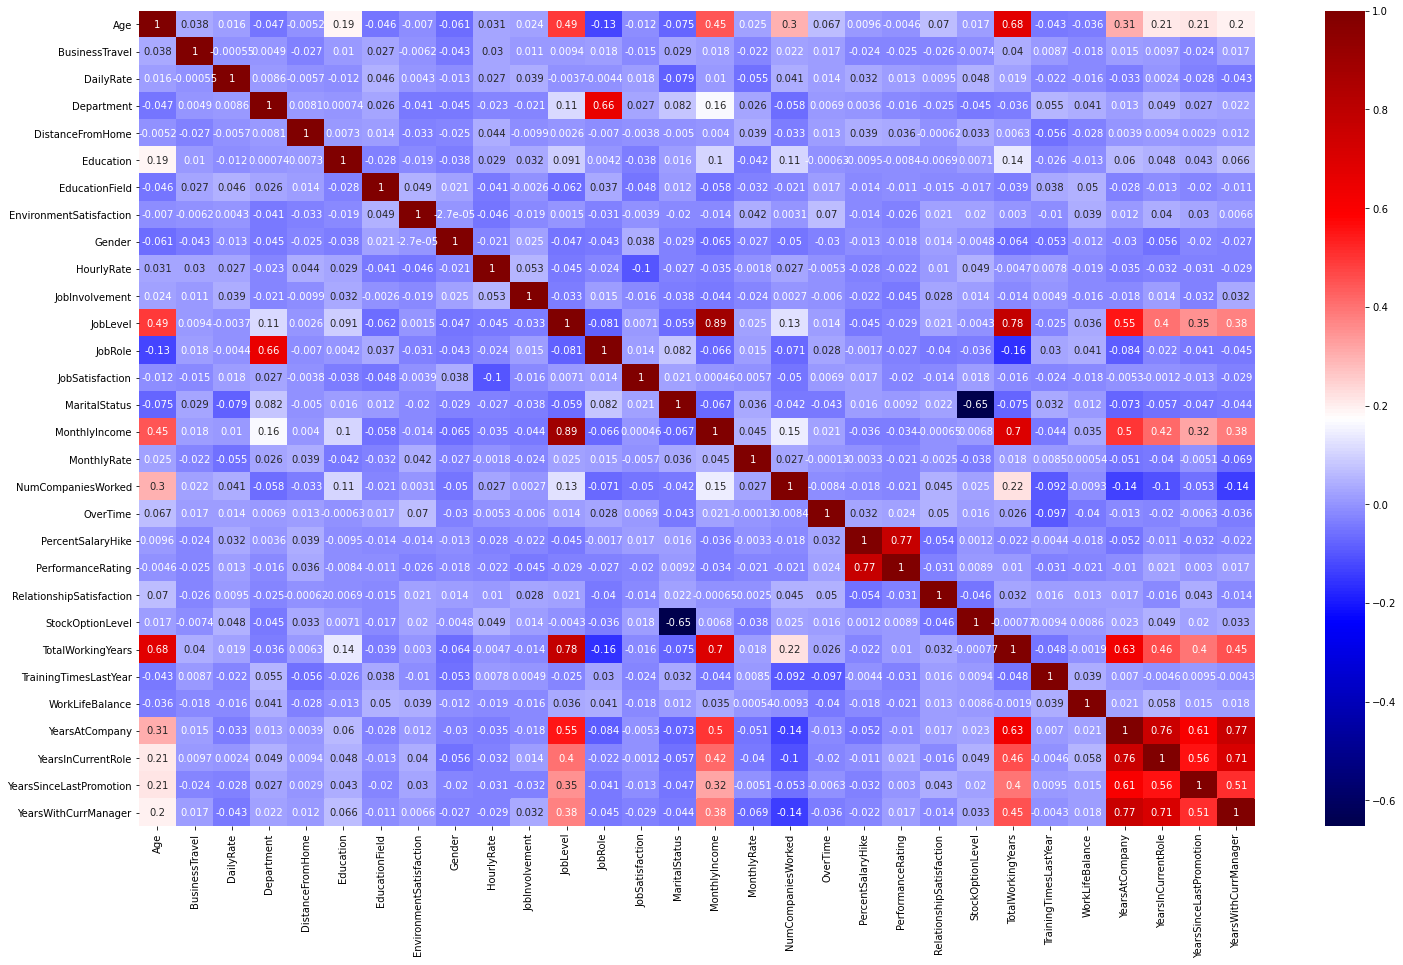

In [30]:
# visualizing correlation using a heatmap
plt.figure(figsize = (25,15))
sns.heatmap(corr, annot = True, cmap = "seismic");

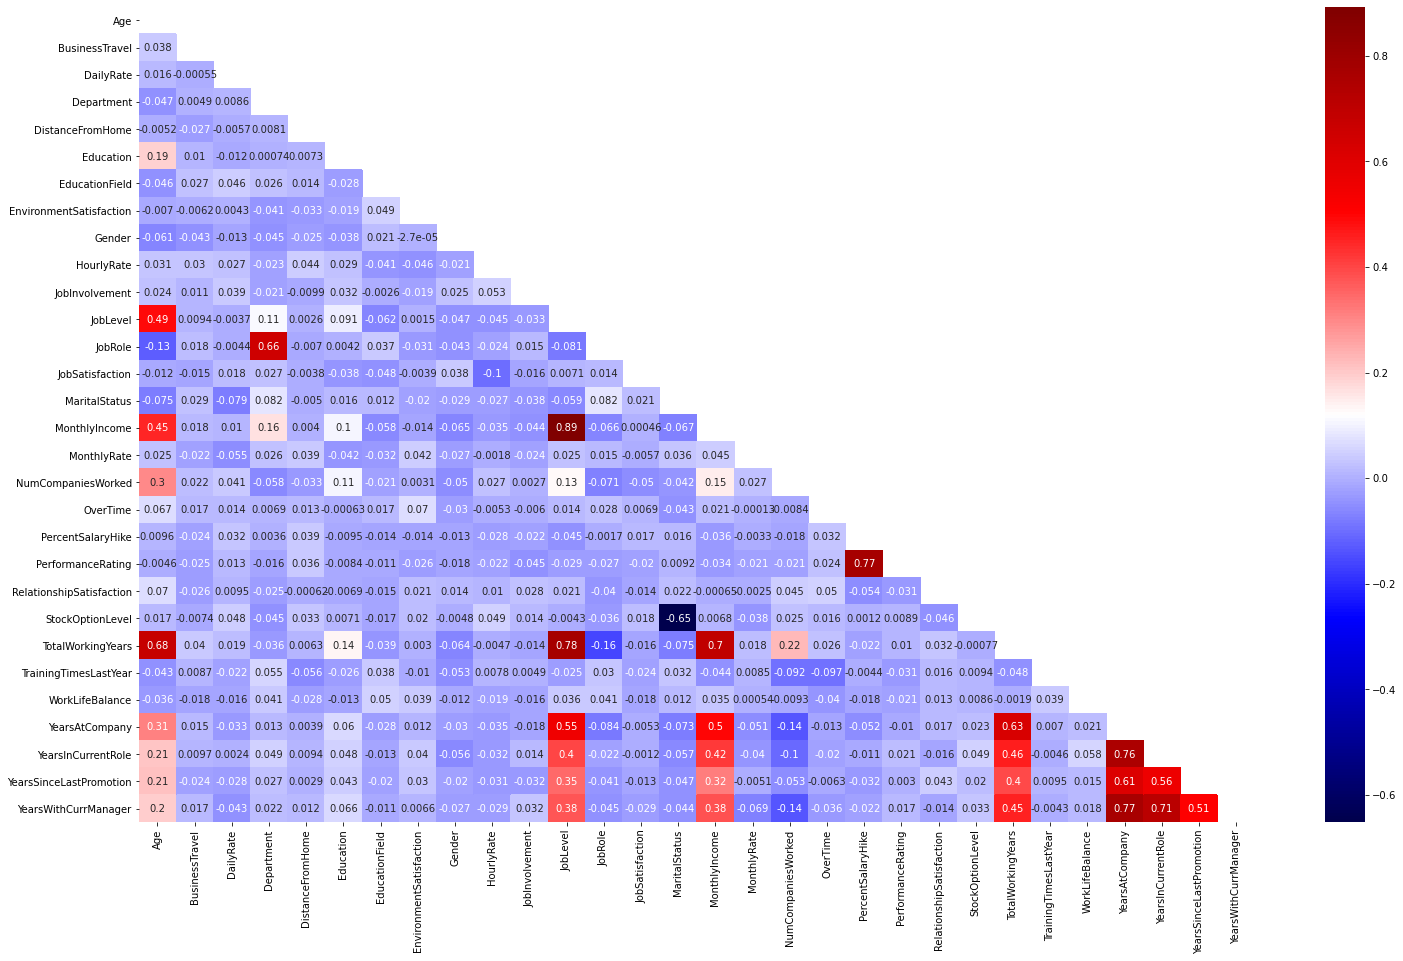

In [31]:
# use of the mask 
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
fig = plt.figure(figsize = (25,15))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

In [32]:
fig.savefig('heatmap.png')

In [33]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[j]
                col_corr.add(colname)
    return col_corr

In [34]:
corr_features = correlation(X_train, 0.85) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

1
{'JobLevel'}


In [35]:
# So let's drop the feature MonthlyIncome 
raw_data.drop(columns = 'JobLevel',inplace=True)

In [36]:
print(raw_data.shape)
raw_data.head()

(1470, 30)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,...,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,...,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,...,0,3,1,6,3,2,2,2,2,2


### Convert categorical features to separate columns



In [37]:
for column in raw_data.columns:
    unique_vals = raw_data[column].unique()
    length = len(unique_vals)
    if length < 18:
        print("The number of values for feature {}: {} ---> {}".format(column, length, unique_vals))
    else:
        print("The number of values for feature {}: {}".format(column, length))

The number of values for feature Age: 43
The number of values for feature Attrition: 2 ---> [1 0]
The number of values for feature BusinessTravel: 3 ---> [2 1 0]
The number of values for feature DailyRate: 886
The number of values for feature Department: 3 ---> [2 1 0]
The number of values for feature DistanceFromHome: 29
The number of values for feature Education: 5 ---> [1 0 3 2 4]
The number of values for feature EducationField: 6 ---> [1 4 3 2 5 0]
The number of values for feature EnvironmentSatisfaction: 4 ---> [1 2 3 0]
The number of values for feature Gender: 2 ---> [0 1]
The number of values for feature HourlyRate: 71
The number of values for feature JobInvolvement: 4 ---> [2 1 3 0]
The number of values for feature JobRole: 9 ---> [7 6 2 4 0 3 8 5 1]
The number of values for feature JobSatisfaction: 4 ---> [3 1 2 0]
The number of values for feature MaritalStatus: 3 ---> [2 1 0]
The number of values for feature MonthlyIncome: 1349
The number of values for feature MonthlyRate: 14

In [38]:
new_raw_data = pd.get_dummies(raw_data, columns = ['BusinessTravel', 'Department',
       'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus','NumCompaniesWorked', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance'])
print(new_raw_data.shape)

(1470, 89)


In [39]:
list(new_raw_data.columns)

['Age',
 'Attrition',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_0',
 'BusinessTravel_1',
 'BusinessTravel_2',
 'Department_0',
 'Department_1',
 'Department_2',
 'Education_0',
 'Education_1',
 'Education_2',
 'Education_3',
 'Education_4',
 'EducationField_0',
 'EducationField_1',
 'EducationField_2',
 'EducationField_3',
 'EducationField_4',
 'EducationField_5',
 'EnvironmentSatisfaction_0',
 'EnvironmentSatisfaction_1',
 'EnvironmentSatisfaction_2',
 'EnvironmentSatisfaction_3',
 'Gender_0',
 'Gender_1',
 'JobInvolvement_0',
 'JobInvolvement_1',
 'JobInvolvement_2',
 'JobInvolvement_3',
 'JobRole_0',
 'JobRole_1',
 'JobRole_2',
 'JobRole_3',
 'JobRole_4',
 'JobRole_5',
 'JobRole_6',
 'JobRole_7',
 'JobRole_8',
 'JobSatisfaction_0',
 'JobSatisfaction_1',
 'JobSatisfaction_2',
 'JobSatisfac

# Train test split for classification

In [40]:
X = new_raw_data.drop(columns = 'Attrition') # Input features (attributes)
y = new_raw_data['Attrition'] # Target Vector

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

In [42]:
# We need to scale correctly (We will use MinMax Scaler to do this)
cols_to_scale = ['Age', 'DailyRate', 'DistanceFromHome','HourlyRate','MonthlyIncome', 'MonthlyRate','PercentSalaryHike',
               'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager',
 'YearsSinceLastPromotion']
scaler = MinMaxScaler()
scaler.fit(X_train[cols_to_scale])
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [43]:
X_train.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,...,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_0,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3
1052,0.285714,0.635028,0.214286,0.485714,0.008166,0.211228,0.142857,0.025641,0.027778,0.000000,...,0,1,0,0,0,0,0,1,0,0
1267,0.380952,0.910734,0.321429,0.814286,0.351151,0.421754,0.214286,0.384615,0.416667,0.777778,...,0,0,1,0,0,0,0,0,1,0
997,0.214286,0.025989,0.571429,0.300000,0.120267,0.956491,0.142857,0.205128,0.222222,0.111111,...,0,1,0,0,0,0,0,0,1,0
882,0.428571,0.186441,0.000000,0.671429,0.802524,0.084211,0.714286,0.435897,0.194444,0.388889,...,0,1,0,0,0,0,0,0,1,0
404,0.238095,0.849718,0.571429,0.700000,0.434298,0.465965,0.071429,0.256410,0.277778,0.000000,...,0,1,0,0,0,0,0,0,1,0


In [44]:
X_test.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,...,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_0,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3
249,0.642857,0.772881,0.214286,0.671429,0.634744,0.120702,0.428571,0.230769,0.083333,0.111111,...,1,0,0,0,0,0,0,0,1,0
1242,0.523810,0.368362,0.214286,0.828571,0.994803,0.093333,0.214286,0.538462,0.583333,0.444444,...,0,0,1,0,0,0,0,1,0,0
903,0.261905,0.875706,0.214286,0.742857,0.651819,0.082807,0.000000,0.153846,0.166667,0.000000,...,0,1,0,0,0,0,0,0,1,0
1450,0.404762,0.738983,0.892857,0.014286,0.750557,0.594386,0.357143,0.230769,0.250000,0.000000,...,0,1,0,0,0,0,0,0,1,0
876,0.047619,0.401130,0.714286,0.185714,0.176689,0.117895,0.428571,0.051282,0.055556,0.055556,...,0,1,0,0,0,0,0,0,1,0


# Classification Algorithms

## ZeroR classifier

In [45]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50}, fmt='d')
    else:
        sns.heatmap(cm, vmin=0., vmax=1., annot=True)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [46]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
dummy_clf = DummyClassifier(strategy = 'most_frequent', random_state = 20)
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, dummy_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

Train Accuracy:  0.8384353741496599
Test Accuracy:  0.8401360544217688


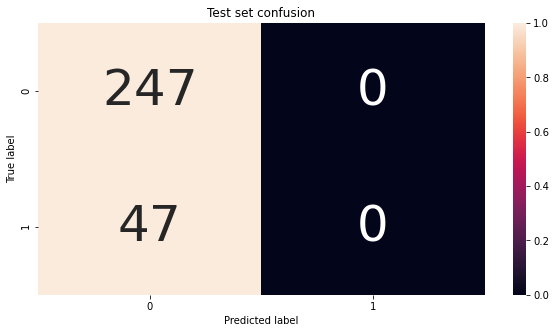

In [47]:
y_pred = dummy_clf.predict(X_test)

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
fig = plt.figure(figsize = (10,5))
plot_confusion_matrix(cm, classes=dummy_clf.classes_, title='Test set confusion')

In [48]:
fig.savefig('confusion matrix.png')

In [49]:
#Accuracy from the confusion matrix
(247)/(247 + 47)

0.8401360544217688

## Decision Tree 

In [50]:
# Create a model
dt = DecisionTreeClassifier( criterion='entropy',max_depth = 2, random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [51]:
import graphviz 

dot_data = tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=new_raw_data.drop('Attrition', axis=1).columns,    
    class_names=new_raw_data['Attrition'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)

#graph
#Go to https://dreampuf.github.io/GraphvizOnline
# and put the code in tree.dot to visualize the tree

### Feature Importance

In [52]:
for i, column in enumerate(raw_data.drop('Attrition', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data

final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index(drop=True)            
final_fi

Importance of feature Age:, 0.000
Importance of feature BusinessTravel:, 0.000
Importance of feature DailyRate:, 0.000
Importance of feature Department:, 0.000
Importance of feature DistanceFromHome:, 0.318
Importance of feature Education:, 0.000
Importance of feature EducationField:, 0.000
Importance of feature EnvironmentSatisfaction:, 0.267
Importance of feature Gender:, 0.000
Importance of feature HourlyRate:, 0.000
Importance of feature JobInvolvement:, 0.000
Importance of feature JobRole:, 0.000
Importance of feature JobSatisfaction:, 0.000
Importance of feature MaritalStatus:, 0.000
Importance of feature MonthlyIncome:, 0.000
Importance of feature MonthlyRate:, 0.000
Importance of feature NumCompaniesWorked:, 0.000
Importance of feature OverTime:, 0.000
Importance of feature PercentSalaryHike:, 0.000
Importance of feature PerformanceRating:, 0.000
Importance of feature RelationshipSatisfaction:, 0.000
Importance of feature StockOptionLevel:, 0.000
Importance of feature TotalWork

,Variable,Feature Importance Score
0,DistanceFromHome,0.318104
1,EnvironmentSatisfaction,0.266518
2,Age,0.000000
3,NumCompaniesWorked,0.000000
4,YearsSinceLastPromotion,0.000000
5,YearsInCurrentRole,0.000000
6,YearsAtCompany,0.000000
7,WorkLifeBalance,0.000000
8,TrainingTimesLastYear,0.000000
9,TotalWorkingYears,0.000000


### To avoid overfitting lets try to use level of depth

Depth =  2 , Training Accuracy =  0.8469387755102041 , Test Accuracy =  0.8401360544217688 , Diff =  0.6802721088435382  %
Depth =  3 , Training Accuracy =  0.8673469387755102 , Test Accuracy =  0.8401360544217688 , Diff =  2.7210884353741416  %
Depth =  4 , Training Accuracy =  0.8741496598639455 , Test Accuracy =  0.8401360544217688 , Diff =  3.4013605442176797  %
Depth =  5 , Training Accuracy =  0.8903061224489796 , Test Accuracy =  0.826530612244898 , Diff =  6.3775510204081565  %
Depth =  6 , Training Accuracy =  0.9115646258503401 , Test Accuracy =  0.7993197278911565 , Diff =  11.22448979591837  %
Depth =  7 , Training Accuracy =  0.935374149659864 , Test Accuracy =  0.7857142857142857 , Diff =  14.965986394557829  %
Depth =  8 , Training Accuracy =  0.9659863945578231 , Test Accuracy =  0.782312925170068 , Diff =  18.36734693877551  %
Depth =  9 , Training Accuracy =  0.9761904761904762 , Test Accuracy =  0.7925170068027211 , Diff =  18.36734693877551  %
Depth =  10 , Training

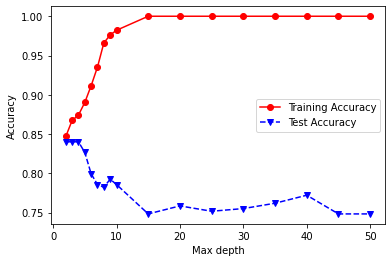

In [53]:
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

### Result Decision Tree

In [54]:
# Accuracy Report
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, dt.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.97      0.92       247
           1       0.68      0.32      0.43        47

    accuracy                           0.87       294
   macro avg       0.78      0.65      0.68       294
weighted avg       0.85      0.87      0.85       294

Train Accuracy:  0.8537414965986394
Test Accuracy:  0.8673469387755102


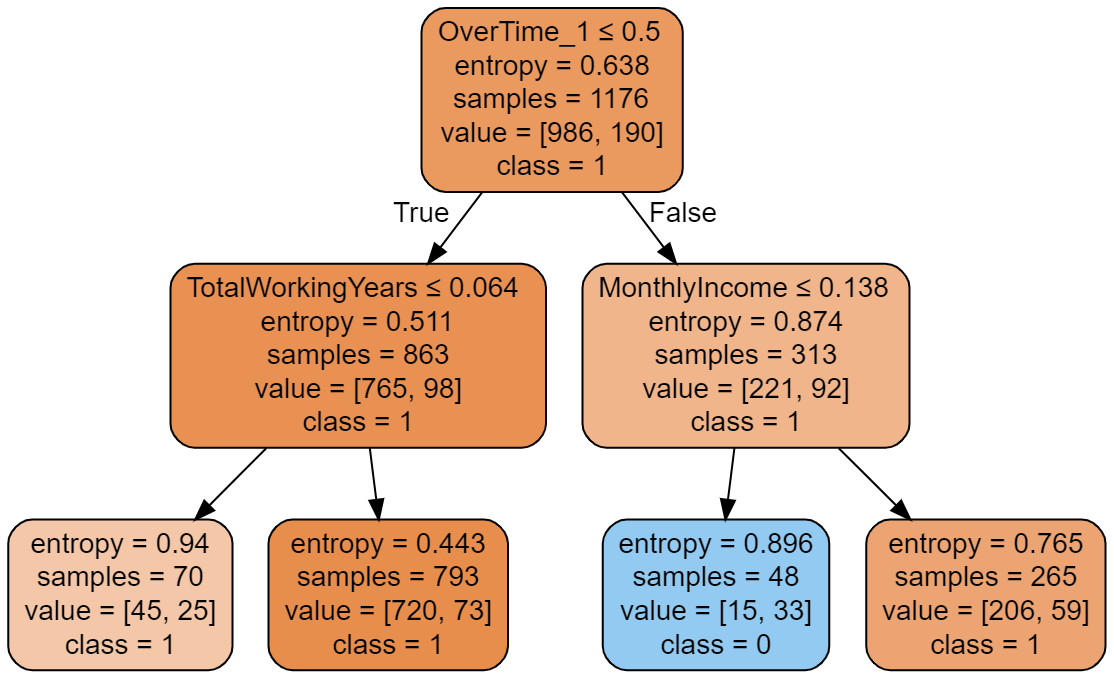

In [55]:
from IPython.display import Image

Image(filename = "Graphviz.png", width=900, height=900)

## K-Nearest Neighbor

In [56]:
knn_clf = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2) # Euclidean Distance Metric
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, knn_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       247
           1       1.00      0.13      0.23        47

    accuracy                           0.86       294
   macro avg       0.93      0.56      0.57       294
weighted avg       0.88      0.86      0.81       294

Train Accuracy:  0.8571428571428571
Test Accuracy:  0.8605442176870748


In [57]:
k = range(1, 60)
train_acc = []
test_acc = []
for x in k:
    knn_clf = KNeighborsClassifier(n_neighbors = x, metric = 'minkowski', p = 2) # Euclidean Distance Metric
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    train_acc.append(accuracy_score(y_train, knn_clf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, y_pred))

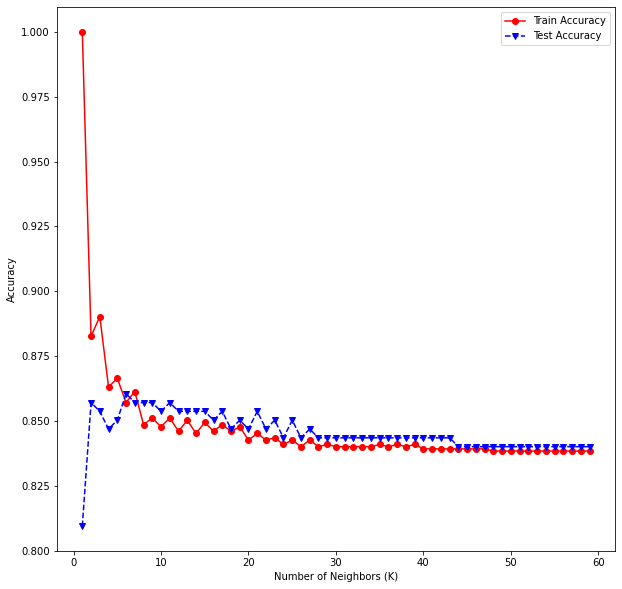

In [58]:
plt.figure(figsize = (10,10))
plt.plot(k,train_acc,'ro-',k,test_acc,'bv--')
plt.legend(['Train Accuracy','Test Accuracy'])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy');

In [59]:
for x in k:
    print('Number of neighbors = ', x, "Train accuracy = ", train_acc[x-1], "Test Accuracy = ", test_acc[x-1], "Difference = ",
         (abs(train_acc[x-1] - test_acc[x-1])*100), "%")

Number of neighbors =  1 Train accuracy =  1.0 Test Accuracy =  0.8095238095238095 Difference =  19.047619047619047 %
Number of neighbors =  2 Train accuracy =  0.8826530612244898 Test Accuracy =  0.8571428571428571 Difference =  2.5510204081632737 %
Number of neighbors =  3 Train accuracy =  0.8903061224489796 Test Accuracy =  0.8537414965986394 Difference =  3.656462585034015 %
Number of neighbors =  4 Train accuracy =  0.8630952380952381 Test Accuracy =  0.8469387755102041 Difference =  1.6156462585034004 %
Number of neighbors =  5 Train accuracy =  0.8664965986394558 Test Accuracy =  0.8503401360544217 Difference =  1.6156462585034115 %
Number of neighbors =  6 Train accuracy =  0.8571428571428571 Test Accuracy =  0.8605442176870748 Difference =  0.3401360544217691 %
Number of neighbors =  7 Train accuracy =  0.8613945578231292 Test Accuracy =  0.8571428571428571 Difference =  0.42517006802721413 %
Number of neighbors =  8 Train accuracy =  0.8486394557823129 Test Accuracy =  0.857

## SVM Classifier

In [60]:
# training the svm classifier 
svm_classifier= svm.SVC(kernel='linear', probability=True, random_state=0)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, knn_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       247
           1       0.74      0.43      0.54        47

    accuracy                           0.88       294
   macro avg       0.82      0.70      0.74       294
weighted avg       0.87      0.88      0.87       294

Train Accuracy:  0.8384353741496599
Test Accuracy:  0.8843537414965986


## Ensemble Learning - Random Forest

In [61]:
rf_classifier=RandomForestClassifier(n_estimators=20, random_state=0).fit(X_train, y_train)
prediction=rf_classifier.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       247
           1       0.67      0.17      0.27        47

    accuracy                           0.85       294
   macro avg       0.76      0.58      0.59       294
weighted avg       0.83      0.85      0.82       294



# Ensemble Learning - Voting

In [62]:
estimator = []
estimator.append(('DTC', DecisionTreeClassifier( criterion='entropy',max_depth = 2, random_state=0)))
estimator.append(('RF', RandomForestClassifier(n_estimators=20, random_state=0)))
estimator.append(('SVC', SVC(kernel='linear', probability=True, random_state=0)))
estimator.append(('KNN', KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)))

# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X_train, y_train)
y_pred = vot_soft.predict(X_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score % d" % score)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Soft Voting Score  0
[[247   0]
 [ 38   9]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       247
           1       1.00      0.19      0.32        47

    accuracy                           0.87       294
   macro avg       0.93      0.60      0.62       294
weighted avg       0.89      0.87      0.83       294



# Multiple ROC-Curves in a single plot

In [63]:
final_roc_auc = []

In [64]:
#use the model to predict the target values for test dataset. We are storing the predicted class by all the models and we will use it to get the ROC AUC score
probas1 = dummy_clf.predict_proba(X_test)[:, 1]
probas2 = dt.predict_proba(X_test)[:, 1]
probas3 = knn_clf.predict_proba(X_test)[:, 1]
probas4 = svm_classifier.predict_proba(X_test)[:, 1]
probas5 = rf_classifier.predict_proba(X_test)[:, 1]
probas6 = vot_soft.predict_proba(X_test)[:, 1]

In [65]:
# get False Positive Rates and True Postive rates for the Classifiers because these will be used to plot the ROC Curve.
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, probas1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, probas2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, probas3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, probas4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, probas5)
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, probas6)

In [66]:
print('roc_auc_score for ZeroR Classifier: ', roc_auc_score(y_test, probas1))
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, probas2))
print('roc_auc_score for KNN Classifier: ', roc_auc_score(y_test, probas3))
print('roc_auc_score for SVM Classifier: ', roc_auc_score(y_test, probas4))
print('roc_auc_score for Random Forest Classifier: ', roc_auc_score(y_test, probas5))
print('roc_auc_score for Voting Classifier: ', roc_auc_score(y_test, probas6))

roc_auc_score for ZeroR Classifier:  0.5
roc_auc_score for DecisionTree:  0.7885692135412181
roc_auc_score for KNN Classifier:  0.81884744594711
roc_auc_score for SVM Classifier:  0.8788009303126884
roc_auc_score for Random Forest Classifier:  0.7817210784735982
roc_auc_score for Voting Classifier:  0.8829356533723836


In [67]:
final_roc_auc.append({'model_name': 'ZeroR Classifier', 'fpr': false_positive_rate1, 'tpr': true_positive_rate1, 'auc': roc_auc_score(y_test, probas1)})
final_roc_auc.append({'model_name': 'Decision Tree Classifier', 'fpr': false_positive_rate2, 'tpr': true_positive_rate2, 'auc': roc_auc_score(y_test, probas2)})
final_roc_auc.append({'model_name': 'KNeighbors Classifier', 'fpr': false_positive_rate3, 'tpr': true_positive_rate3, 'auc': roc_auc_score(y_test, probas3)})
final_roc_auc.append({'model_name': 'SVM Classifier', 'fpr': false_positive_rate4, 'tpr': true_positive_rate4, 'auc': roc_auc_score(y_test, probas4)})
final_roc_auc.append({'model_name': 'Random Forest Classifier', 'fpr': false_positive_rate5, 'tpr': true_positive_rate5, 'auc': roc_auc_score(y_test, probas5)})
final_roc_auc.append({'model_name': 'Voting Classifier', 'fpr': false_positive_rate6, 'tpr': true_positive_rate6, 'auc': roc_auc_score(y_test, probas6)})

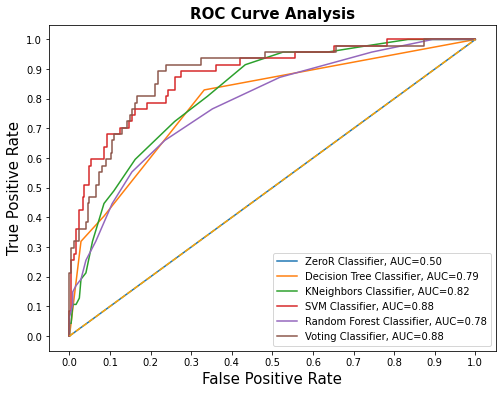

In [68]:
fig = plt.figure(figsize=(8,6))

for m in final_roc_auc:
    plt.plot(m['fpr'], 
             m['tpr'], 
             label="{}, AUC={:.2f}".format(m['model_name'], m['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')

plt.show()

In [69]:
# export the figure.
fig.savefig('multiple_roc_curve.png')

# Hyper parameter Optimization on all the classifiers

#### Use Grid Search on Decision Tree

In [70]:
dt = DecisionTreeClassifier(random_state=42)

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [71]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=100, random_state=42)

In [72]:
dt_best = grid_search.best_estimator_

In [73]:
dt_best

DecisionTreeClassifier(max_depth=2, min_samples_leaf=100, random_state=42)

In [74]:
import graphviz 

data = tree.export_graphviz(dt_best, out_file='tree1.dot', 
    feature_names=new_raw_data.drop('Attrition', axis=1).columns,    
    class_names=new_raw_data['Attrition'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(data)

#graph
#Go to https://dreampuf.github.io/GraphvizOnline
# and put the code in tree.dot to visualize the tree

In [75]:
y_pred=dt_best.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[229  18]
 [ 22  25]]
Accuracy Score 0.8639455782312925
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       247
           1       0.58      0.53      0.56        47

    accuracy                           0.86       294
   macro avg       0.75      0.73      0.74       294
weighted avg       0.86      0.86      0.86       294



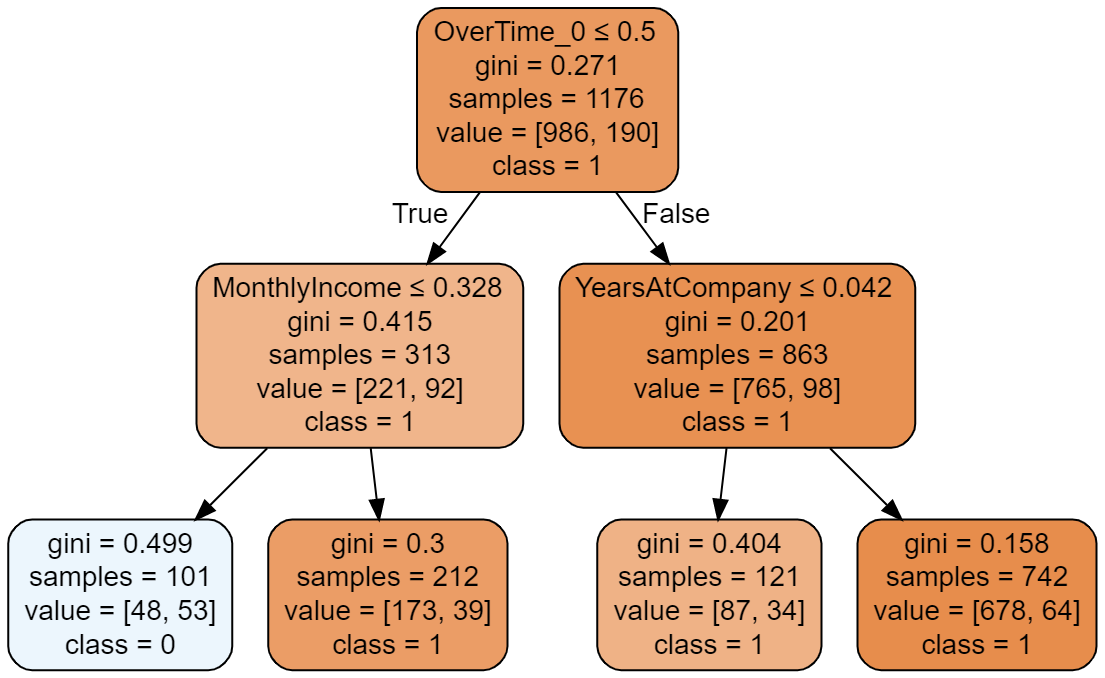

In [76]:
from IPython.display import Image

Image(filename = "Graphvizz.png", width=900, height=900)

#### RandomizedSearchCV for Random Forest

In [77]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [78]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [79]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 780,
 'criterion': 'gini'}

In [80]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [81]:
rf_randomcv.best_estimator_

RandomForestClassifier(max_depth=780, max_features='sqrt', min_samples_split=5,
                       n_estimators=600)

In [82]:
best_random_grid=rf_randomcv.best_estimator_

In [83]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))

[[245   2]
 [ 37  10]]
Accuracy Score 0.8673469387755102
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       247
           1       0.83      0.21      0.34        47

    accuracy                           0.87       294
   macro avg       0.85      0.60      0.63       294
weighted avg       0.86      0.87      0.83       294



#### Use Grid Search on random forest

In [84]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 780,
 'criterion': 'gini'}

In [85]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [780], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [3, 4, 5, 6, 7], 'n_estimators': [400, 500, 600, 700, 800]}


In [86]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
rf_gridsearch=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
rf_gridsearch.fit(X_train,y_train)


Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [780],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [400, 500, 600, 700, 800]},
             verbose=2)

In [87]:
rf_gridsearch.best_estimator_

RandomForestClassifier(max_depth=780, max_features='sqrt', min_samples_split=5,
                       n_estimators=600)

In [88]:
rf_bestgrid=rf_gridsearch.best_estimator_

In [89]:
rf_bestgrid

RandomForestClassifier(max_depth=780, max_features='sqrt', min_samples_split=5,
                       n_estimators=600)

In [90]:
y_pred=rf_bestgrid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[245   2]
 [ 39   8]]
Accuracy Score 0.8605442176870748
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       247
           1       0.80      0.17      0.28        47

    accuracy                           0.86       294
   macro avg       0.83      0.58      0.60       294
weighted avg       0.85      0.86      0.82       294



#### Grid Search CV Optimization for SVM


In [91]:
svm_clf = svm.SVC()
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'sigmoid'],
             'probability': [True, False]}
 
svm_grid = GridSearchCV(SVC(), param_grid,cv=10,n_jobs=-1,verbose=2)
 
# fitting the model for grid search
svm_grid.fit(X_train, y_train)


Fitting 10 folds for each of 150 candidates, totalling 1500 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'sigmoid'],
                         'probability': [True, False]},
             verbose=2)

In [96]:
svm_grid.best_estimator_

SVC(C=0.1, gamma=1, kernel='linear', probability=True)

In [97]:
svm_bestgrid=svm_grid.best_estimator_

In [98]:
svm_bestgrid

SVC(C=0.1, gamma=1, kernel='linear', probability=True)

In [99]:
y_pred=svm_bestgrid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[242   5]
 [ 31  16]]
Accuracy Score 0.8775510204081632
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       247
           1       0.76      0.34      0.47        47

    accuracy                           0.88       294
   macro avg       0.82      0.66      0.70       294
weighted avg       0.87      0.88      0.86       294



#### Use Grid Search on KNN

In [100]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [5,6,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose  = 1,
    cv = 3,
    n_jobs = -1
    )
    
knn_grid.fit(X_train, y_train)
    

Fitting 3 folds for each of 42 candidates, totalling 126 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 6, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [101]:
knn_grid.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [102]:
knn_bestgrid=knn_grid.best_estimator_

In [103]:
knn_bestgrid

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [104]:
y_pred=knn_bestgrid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[247   0]
 [ 40   7]]
Accuracy Score 0.8639455782312925
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       247
           1       1.00      0.15      0.26        47

    accuracy                           0.86       294
   macro avg       0.93      0.57      0.59       294
weighted avg       0.88      0.86      0.82       294



# Ensemble Learning - Voting Classifier

In [105]:
estimator = []
estimator.append(('DTC', DecisionTreeClassifier(max_depth=2, min_samples_leaf=100, random_state=42)))
estimator.append(('RFG',RandomForestClassifier(max_depth=780, max_features='sqrt', min_samples_split=5,
                       n_estimators=600)))
estimator.append(('SVC', SVC(C=0.1, gamma=1, kernel='linear', probability=True)))
estimator.append(('KNN', KNeighborsClassifier(metric='manhattan', n_neighbors=9)))

# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X_train, y_train)
y_pred = vot_soft.predict(X_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score % d" % score)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Soft Voting Score  0
[[247   0]
 [ 35  12]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       247
           1       1.00      0.26      0.41        47

    accuracy                           0.88       294
   macro avg       0.94      0.63      0.67       294
weighted avg       0.90      0.88      0.85       294



# Multiple Roc curves in a single Plot After Hyper Parameter Optimization

In [106]:
result_table = []

In [107]:
#use the model to predict the target values for test dataset. We are storing the predicted class by all the models and we will use it to get the ROC AUC score
probas1 = dummy_clf.predict_proba(X_test)[:, 1]
probas2 = dt_best.predict_proba(X_test)[:, 1]
probas3 = knn_bestgrid.predict_proba(X_test)[:, 1]
probas4 = svm_bestgrid.predict_proba(X_test)[:, 1]
probas5 = rf_bestgrid.predict_proba(X_test)[:, 1]
probas6 = vot_soft.predict_proba(X_test)[:, 1]

In [108]:
# get False Positive Rates and True Postive rates for the Classifiers because these will be used to plot the ROC Curve.
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, probas1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, probas2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, probas3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, probas4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, probas5)
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, probas6)

In [109]:
print('roc_auc_score for ZeroR Classifier: ', roc_auc_score(y_test, probas1))
print('roc_auc_score for Decision Tree Classifier: ', roc_auc_score(y_test, probas2))
print('roc_auc_score for KNN Classifier: ', roc_auc_score(y_test, probas3))
print('roc_auc_score for SVM Classifier: ', roc_auc_score(y_test, probas4))
print('roc_auc_score for Random Forest Classifier: ', roc_auc_score(y_test, probas5))
print('roc_auc_score for Voting Classifier: ', roc_auc_score(y_test, probas6))

roc_auc_score for ZeroR Classifier:  0.5
roc_auc_score for Decision Tree Classifier:  0.7865018520113706
roc_auc_score for KNN Classifier:  0.7310707209923335
roc_auc_score for SVM Classifier:  0.8679472822809888
roc_auc_score for Random Forest Classifier:  0.8694978034283746
roc_auc_score for Voting Classifier:  0.8856921354121802


In [110]:
result_table.append({'model_name': 'ZeroR Classifier', 'fpr': false_positive_rate1, 'tpr': true_positive_rate1, 'auc': roc_auc_score(y_test, probas1)})
result_table.append({'model_name': 'Decision Tree Classifier', 'fpr': false_positive_rate2, 'tpr': true_positive_rate2, 'auc': roc_auc_score(y_test, probas2)})
result_table.append({'model_name': 'KNeighbors Classifier', 'fpr': false_positive_rate3, 'tpr': true_positive_rate3, 'auc': roc_auc_score(y_test, probas3)})
result_table.append({'model_name': 'SVM Classifier', 'fpr': false_positive_rate4, 'tpr': true_positive_rate4, 'auc': roc_auc_score(y_test, probas4)})
result_table.append({'model_name': 'Random Forest Classifier', 'fpr': false_positive_rate5, 'tpr': true_positive_rate5, 'auc': roc_auc_score(y_test, probas5)})
result_table.append({'model_name': 'Voting Classifier', 'fpr': false_positive_rate6, 'tpr': true_positive_rate6, 'auc': roc_auc_score(y_test, probas6)})

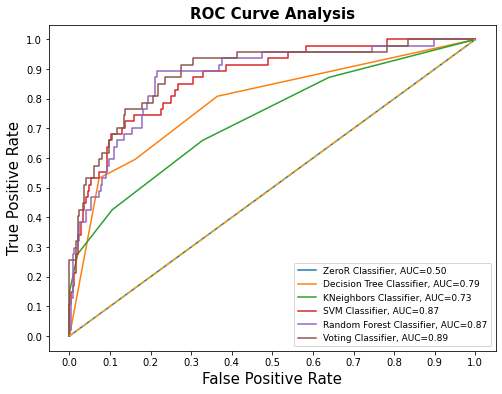

In [111]:
fig = plt.figure(figsize=(8,6))

for m in result_table:
    plt.plot(m['fpr'], 
             m['tpr'], 
             label="{}, AUC={:.2f}".format(m['model_name'], m['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':9}, loc='lower right')

plt.show()

In [112]:
# export the figure.
fig.savefig('multiple_roc_curves.png')